In [30]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/vehicle_stolen_dataset_ with_headers.csv")
df

,number_plate,brand,color,time,stoled
0,N001,BMW,black,night,yes
1,N002,Audi,black,night,no
2,N003,NISSAN,black,night,yes
3,N004,VEGA,red,day,yes
4,N005,BMW,blue,day,no
5,N006,Audi,black,day,yes
6,N007,VEGA,red,night,no
7,N008,Audi,blue,day,yes
8,N009,VEGA,black,day,yes
9,N010,NISSAN,blue,day,no


In [31]:
df.shape

(20, 5)

In [32]:
df.size

100

In [33]:
df.columns

Index(['number_plate', 'brand', 'color', 'time', 'stoled'], dtype='object')

In [34]:
df.dtypes

number_plate    object
brand           object
color           object
time            object
stoled          object
dtype: object

In [35]:
df.isna().sum()

number_plate    0
brand           0
color           0
time            0
stoled          0
dtype: int64

In [36]:
# COUNT OF STOLEN VEHICLES IN THE DATASET
count=df['stoled'].value_counts()
count

yes    13
no      7
Name: stoled, dtype: int64

In [37]:
# COLLECT DATA OF STOLEN CARS
df1=df.loc[df.stoled=='yes']
df1

,number_plate,brand,color,time,stoled
0,N001,BMW,black,night,yes
2,N003,NISSAN,black,night,yes
3,N004,VEGA,red,day,yes
5,N006,Audi,black,day,yes
7,N008,Audi,blue,day,yes
8,N009,VEGA,black,day,yes
10,N011,BMW,black,night,yes
12,N013,VEGA,black,night,yes
14,N015,Audi,black,day,yes
15,N016,Audi,blue,night,yes


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


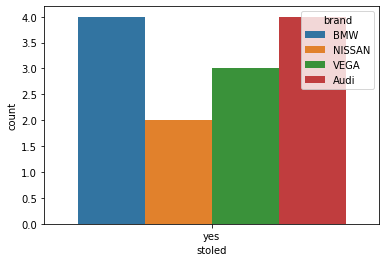

In [38]:
# VISUALIZE
import seaborn as sns
sns.countplot('stoled',data=df1,hue='brand')

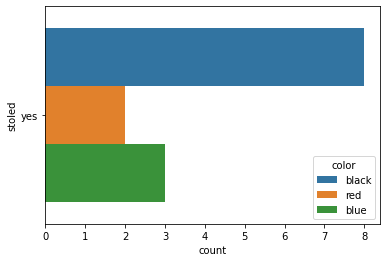

In [39]:
sns.countplot(y='stoled',data=df1,hue='color')

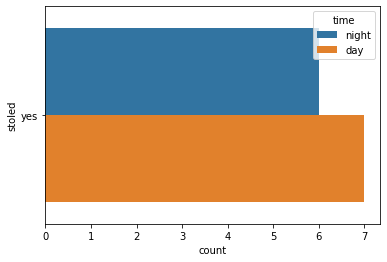

In [40]:
sns.countplot(y='stoled',data=df1,hue='time')

In [41]:
# CARS MOST LIKELY TO BE STOLEN 
# TIME: DAY
# CAR COLOR: BLACK
# CAR BRAND: AUDI,BMW

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


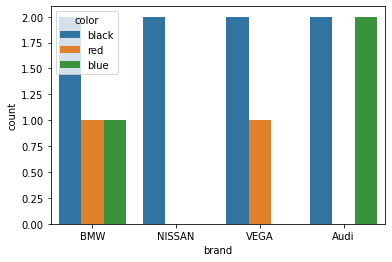

In [42]:
sns.countplot('brand',data=df1,hue='color')

**ABOVE BAR CHART SHOWS THE PREFERRED COLOR OF EACH STOLEN CAR BRAND**

In [43]:
#LABEL ENCODING
from sklearn.preprocessing import LabelEncoder
features=['number_plate','brand','color','time']
df[features]=df[features].apply(LabelEncoder().fit_transform)
df

,number_plate,brand,color,time,stoled
0,0,1,0,1,yes
1,1,0,0,1,no
2,2,2,0,1,yes
3,3,3,2,0,yes
4,4,1,1,0,no
5,5,0,0,0,yes
6,6,3,2,1,no
7,7,0,1,0,yes
8,8,3,0,0,yes
9,9,2,1,0,no


In [44]:
# SEPERATING INPUT X AND OUTPUT Y
df1=df.drop(['number_plate'],axis=1)
df1

,brand,color,time,stoled
0,1,0,1,yes
1,0,0,1,no
2,2,0,1,yes
3,3,2,0,yes
4,1,1,0,no
5,0,0,0,yes
6,3,2,1,no
7,0,1,0,yes
8,3,0,0,yes
9,2,1,0,no


In [45]:
x=df1.iloc[:,:-1].values
y=df1.iloc[:,-1].values

In [46]:
# SEPERATING TRAINING AND TESTING DATA
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [47]:
# NORMALIZATION
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [48]:
# ML MODELLING
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array(['yes', 'yes', 'yes', 'yes', 'yes', 'yes'], dtype=object)

In [49]:
# PERFROMANCE EVALUATION
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
mat=confusion_matrix(y_pred,y_test)
mat

array([[0, 0],
       [1, 5]])

In [50]:
score=accuracy_score(y_pred,y_test)
score

0.8333333333333334

In [51]:
report=classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

          no       0.00      0.00      0.00         0
         yes       1.00      0.83      0.91         6

    accuracy                           0.83         6
   macro avg       0.50      0.42      0.45         6
weighted avg       1.00      0.83      0.91         6



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
